In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
import utils

In [3]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [5]:
zarr_files = utils.find_files(root_dir = '/root/capsule/data', endswith='zarr')

In [6]:
zarr_files

['/root/capsule/data/me_test2/721291_Face_21707174-ce69-4ce2-b7b5-9e0ce26bbc59/motion_energy_frames.zarr',
 '/root/capsule/data/me_test2/721291_Face_ff11a262-7cbd-4576-8548-1558d6bda9d1/motion_energy_frames.zarr',
 '/root/capsule/data/me_test2/721291_Face_d33cb1d6-b65b-4d2f-8fbd-e93136fd44ae/motion_energy_frames.zarr']

In [7]:
pkl_files = utils.find_files(root_dir = '/root/capsule/data', endswith='.pkl', return_dir=False)

In [8]:
pkl_files

['/root/capsule/data/me_test2/721291_Face_21707174-ce69-4ce2-b7b5-9e0ce26bbc59/721291_Face_21707174-ce69-4ce2-b7b5-9e0ce26bbc59.pkl',
 '/root/capsule/data/me_test2/721291_Face_ff11a262-7cbd-4576-8548-1558d6bda9d1/721291_Face_ff11a262-7cbd-4576-8548-1558d6bda9d1.pkl',
 '/root/capsule/data/me_test2/721291_Face_d33cb1d6-b65b-4d2f-8fbd-e93136fd44ae/721291_Face_d33cb1d6-b65b-4d2f-8fbd-e93136fd44ae.pkl']

In [25]:
meta_obj = utils.load_pickle_file(pkl_files[0])

In [ ]:
meta_obj.

In [32]:
meta_obj.loaded_metadata['fps']

60

In [9]:
import zarr
import dask
import dask.array as da
me_store = zarr.DirectoryStore(zarr_files[0])
me_frames = da.from_zarr(me_store, component='data')

In [10]:
### Use object
from PCAgenerator import PCAgenerator

In [11]:
me_pca = PCAgenerator(zarr_files[0], crop_region=(100, 100, 300, 200))

In [13]:
me_pca._apply_pca_to_motion_energy()

Loaded frames (272033, 492, 658)
Applying crop to me frames (100, 100, 300, 200)
Converting frames to NumPy array for PCA...


(PCA(n_components=3),
 array([[ 3.5054113e+04,  5.4318939e+02, -1.5034628e+03],
        [-3.5681245e+00,  1.5522337e+01,  5.3694278e-01],
        [-1.1577512e+01,  2.4080275e+01, -3.4856684e+00],
        ...,
        [ 5.1605968e+00, -5.2076540e+00,  1.6726551e+00],
        [ 1.0894930e+01, -1.2476858e+01,  3.5035310e+00],
        [-2.3348820e+00,  1.3800346e+01, -1.0598356e+01]], dtype=float32))

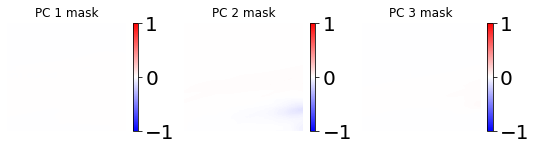

In [21]:

fig = me_pca.plot_spatial_masks()

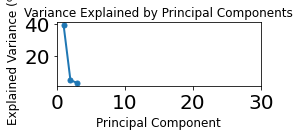

In [23]:
fig = me_pca.plot_explained_variance()